In [ ]:
import pandas as pd
import numpy as np
from numpy import array, linspace ; from numpy.random import randint
from matplotlib.pyplot import hist, xticks, show, yticks,savefig
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import itertools

# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
!pip install --user colour-science
!pip install rdkit-pypi

In [ ]:
!pip install colormath
!pip install colour
from colour import Color

# ML

In [ ]:
!git clone https://katerinavr@github.com/katerinavr/co-polymer-set-transformer.git

Cloning into 'co-polymer-set-transformer'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 51 (delta 17), reused 47 (delta 13), pack-reused 0
Receiving objects: 100% (51/51), 19.13 MiB | 21.39 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
%cd co-polymer-set-transformer

/content/co-polymer-set-transformer


In [110]:
electrochromics = pd.read_csv('/content/ml_electrochromics_database_plus_exp.csv')#('/content/ml_electrochromics.csv')
electrochromics = electrochromics[electrochromics.monomer_B	!='GM1']
electrochromics = electrochromics[electrochromics['monomer_A ']	!='A4']
electrochromics['smiles_A'] = electrochromics['smiles_A'].str.replace('*', 'C')
electrochromics['smiles_B'] = electrochromics['smiles_B'].str.replace('*', 'C')
electrochromics['smiles_C'] = electrochromics['smiles_C'].str.replace('*', 'C')

df=electrochromics#.fillna(0)#['color'] ['a* (Colored State)]
df = df[['smiles_A', 'Percentage of A %', 'smiles_B' , 'Percentage of B %', 'smiles_C', 'Percentage of C %', 'L* (Colored State)', 'a* (Colored State)', 'b*(Colored State)']] # 'Bandgap (eV)',
df['Percentage of A %'] = df['Percentage of A %']/100
df['Percentage of B %'] = df['Percentage of B %']/100
df['Percentage of C %'] = df['Percentage of C %']/100
df = df.dropna(axis=0)
df

,smiles_A,Percentage of A %,smiles_B,Percentage of B %,smiles_C,Percentage of C %,L* (Colored State),a* (Colored State),b*(Colored State)
0,Cc1sc(C)c2OCC(COCCCCCCCC)(COCCCCCCCC)COc12,0.670,Cc4ccc(c2ccc(c1ccc(C)s1)c3nsnc23)s4,0.330,0,0.000,59.00,-29.000,-7.00
1,Cc1sc(C)c2OCC(COCCCCCCCC)(COCCCCCCCC)COc12,0.670,Cc5sc(c3ccc(c2sc(C)c1OCCOc12)c4nsnc34)c6OCCOc56,0.330,0,0.000,66.00,-30.000,-4.00
2,Cc1sc(C)c(OCC(CC)CCCC)c1OCC(CC)CCCC,0.670,Cc1ccc(C)c2nsnc12,0.330,0,0.000,64.00,-37.000,-7.00
3,Cc1sc(C)c(OCC(CC)CCCC)c1OCC(CC)CCCC,0.800,Cc1ccc(C)c2nsnc12,0.200,0,0.000,57.00,7.000,-7.00
4,Cc1sc(C)c(OCC(CC)CCCC)c1OCC(CC)CCCC,0.860,Cc1ccc(C)c2nsnc12,0.140,0,0.000,52.00,34.000,7.00
...,...,...,...,...,...,...,...,...,...
94,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.700,Cc1ccc(C)c2nsnc12,0.150,Cc1ccc3c(c1)Cc2cc(C)ccc23,0.150,94.00,-14.000,-36.00
95,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.675,Cc1ccc(C)c2nsnc12,0.150,Cc1ccc3c(c1)Cc2cc(C)ccc23,0.175,55.88,-11.510,11.81
96,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.625,Cc1ccc(C)c2nsnc12,0.175,Cc1ccc3c(c1)Cc2cc(C)ccc23,0.200,62.41,-21.260,21.45
97,Cc1sc(C)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12,0.575,Cc1ccc(C)c2nsnc12,0.200,Cc1ccc3c(c1)Cc2cc(C)ccc23,0.225,58.67,-26.100,19.78


In [ ]:
!pwd

/content/co-polymer-set-transformer


In [111]:
from copolymer_set_transformer.copolymer_set_transformer import *
from copolymer_set_transformer.monomer_representations import *


In [112]:
dictionary , descriptor_names= get_dft_descriptors_dictionary('datasets/dft_descriptors_ECPs.csv')

In [113]:
def dft_descr_from_df(smiles, prefix):
  df = pd.DataFrame(dft_descr(smiles))

  df.columns =[f'{prefix}_{i}' for i in descriptor_names]
  return df

def dft_descr_from_df(smiles, prefix):
  df = pd.DataFrame(dft_descr(smiles))

  df.columns =[f'{prefix}_{i}' for i in descriptor_names]
  return df

def smile_to_dft(smile):
  return dictionary[smile]


def dft_descr(smiles):
  bits = []
  for smile in smiles:
    try:
      bits.append(np.asarray(smile_to_dft(smile)))
    except:
      bits.append(np.zeros(len(descriptor_names)))
  return bits

In [114]:
df1_dft = dft_descr_from_df(df.smiles_A, 'A')
df2_dft = dft_descr_from_df(df.smiles_B, 'B')
df3_dft = dft_descr_from_df(df.smiles_C, 'C')

# df1_test_dft = dft_descr_from_df(experimental.smiles_A, 'A', descriptor_names= descriptor_names)
# df2_test_dft = dft_descr_from_df(experimental.smiles_B, 'B', descriptor_names= descriptor_names)
# df3_test_dft = dft_descr_from_df(experimental.smiles_C, 'C', descriptor_names= descriptor_names)

In [115]:
from rdkit.Chem import rdFingerprintGenerator
def smile_to_bits(smile):
  mol = Chem.MolFromSmiles(smile)
  return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=False)

def get_vectors(smiles):
  paws = []
  for smile in smiles:
    try:
      paws.append(np.asarray(smile_to_bits(smile)))
    except:
      paws.append(np.zeros(1024))
  return paws

def bits_to_df(smiles, prefix):
  df = pd.DataFrame(get_vectors(smiles))
  columns = [f'{prefix}_{i}' for i in df.columns]
  df.columns = columns
  return df

In [116]:
df1 = bits_to_df(df.smiles_A, 'bit_A')
df2 = bits_to_df(df.smiles_B, 'bit_B')
df3 = bits_to_df(df.smiles_C, 'bit_C')

# df1_test = bits_to_df(experimental.smiles_A, 'bit_A')
# df2_test = bits_to_df(experimental.smiles_B, 'bit_B')
# df3_test = bits_to_df(experimental.smiles_C, 'bit_C')

[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:59] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:59] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:59] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:59] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:59] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:59] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:59] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[19:03:59] SMILES Parse Error: syntax error while parsing: 0
[19:03:5

In [117]:
from sklearn.preprocessing import MinMaxScaler
# scaler_L = MinMaxScaler()
# scaler_a = MinMaxScaler()
# scaler_b = MinMaxScaler()
#df['a* (Colored State)'] =  scaler_a.fit_transform(np.array(df['a* (Colored State)'].values.reshape(-1,1)))
#df['b*(Colored State)'] = scaler_b.fit_transform(np.array(df['b*(Colored State)'].values.reshape(-1,1)))
#df['L* (Colored State)'] = scaler_L.fit_transform(np.array(df['L* (Colored State)'].values.reshape(-1,1)))
df_y = df[['L* (Colored State)' ,'a* (Colored State)', 'b*(Colored State)']]#, 'Bandgap (eV)']]
#[float(i) for i in str(y_new[:,1]).replace('na', '0')]
scalery = MinMaxScaler().fit(df_y.values)
#scalery = my_scaler
df_y_scaled = scalery.transform(df_y)
#df_y_scaled
#df_y_inverse = scalery.inverse_transform(df_y_scaled)
#df_y_inverse

In [118]:
dataset = pd.concat([df1,df1_dft,pd.DataFrame(df[['Percentage of A %']].values, columns=['Percentage of A %']),df2,df2_dft,pd.DataFrame(df[['Percentage of B %']].values, columns=['Percentage of B %']),
                     df3,df3_dft, pd.DataFrame(df[['Percentage of C %']].values, columns=['Percentage of C %']) ], axis=1) #
dataset#.dropna(axis=0)#.shape #.head()

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150
93,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175
94,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200
95,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225


In [89]:
!pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 513.9 kB/s eta 0:00:00


In [119]:
full_dataset = pd.concat([pd.DataFrame(dataset.values, columns=dataset.columns.values), pd.DataFrame(df_y_scaled, columns=['L','a','b'])], axis=1)
full_dataset

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %,L,a,b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.456432,0.076190,0.378378
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.553250,0.066667,0.398649
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.525588,0.000000,0.378378
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.428769,0.419048,0.378378
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.359613,0.676190,0.472973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.150,0.940526,0.219048,0.182432
93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.175,0.413278,0.242762,0.505473
94,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.503596,0.149905,0.570608
95,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.225,0.451867,0.103810,0.559324


In [120]:
from fast_ml.model_development import train_valid_test_split
np.random.seed(8) #5
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(full_dataset, target = ['L','a','b'],
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
X_train

,bit_A_0,bit_A_1,bit_A_2,bit_A_3,bit_A_4,bit_A_5,bit_A_6,bit_A_7,bit_A_8,bit_A_9,...,C_ES_osc_strength_2,C_ES_osc_strength_3,C_ES_osc_strength_4,C_ES_osc_strength_5,C_ES_osc_strength_6,C_ES_osc_strength_7,C_ES_osc_strength_8,C_ES_osc_strength_9,C_ES_osc_strength_10,Percentage of C %
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
77,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
44,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [121]:
# Train the ML model with train data extracted from literature
Ndims = int(X_train.shape[1]/3)
#0.15, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 450
device ='cpu'
epochs, learning_rate, batch_size = 750, 1e-3, 12
dropout_ratio = 0.15

model = CoPolymerSetTransformer(dropout_ratio, device, epochs, learning_rate, batch_size, use_abs_decoder=False)

# Prepare your data
train_data_1, train_data_2, train_data_3= np.array(X_train.iloc[:, :Ndims].values, dtype=float), np.array(X_train.iloc[:, Ndims:2*Ndims].values, dtype=float), np.array(X_train.iloc[:, 2*Ndims:].values, dtype=float)#, np.array(y_train, dtype=np.float16)
y_lab = np.array(y_train) #, dtype=np.float16)
# y_new1 = np.array(y_train_lit_lab, dtype=np.float16)
# y_abs=False, y_lab=False
# Train the model
# losses1, losses2, optimizer1, optimizer2 =
losses1, losses2 = model.train_model(train_data_1, train_data_2,train_data_3, y_lab)

losses1, losses2

100%|██████████| 750/750 [04:39<00:00,  2.69it/s]


([0.3193387985229492,
  0.38723960518836975,
  0.19809606671333313,
  0.155183345079422,
  0.15917307138442993,
  0.09579724818468094,
  0.11147948354482651,
  0.10431007295846939,
  0.09157022833824158,
  0.11470334976911545,
  0.11245201528072357,
  0.07439640164375305,
  0.1044032946228981,
  0.06964471191167831,
  0.09013573080301285,
  0.09919814020395279,
  0.10259613394737244,
  0.07930304855108261,
  0.07098381221294403,
  0.07396777719259262,
  0.07011387497186661,
  0.0897529125213623,
  0.07238863408565521,
  0.0887923389673233,
  0.07343580573797226,
  0.07358719408512115,
  0.08437326550483704,
  0.0944492295384407,
  0.08106853067874908,
  0.07712159305810928,
  0.09540332853794098,
  0.05426784232258797,
  0.07058319449424744,
  0.06488621979951859,
  0.06505561619997025,
  0.10054755210876465,
  0.06404265761375427,
  0.05656741186976433,
  0.05630632862448692,
  0.07462402433156967,
  0.07125944644212723,
  0.09630843251943588,
  0.08854652941226959,
  0.06593710184097

MAE: 0.012 (0.013)


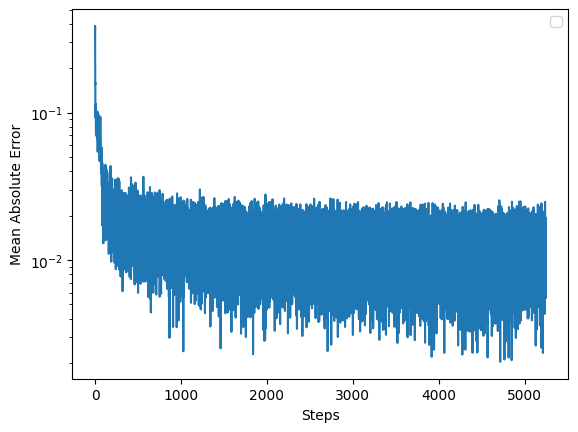

In [122]:
# for losses in [losses1]:
#   plt.plot(losses)#, label=_name)
plt.plot(losses1)
print('MAE: %.3f (%.3f)' % (np.mean(losses1), np.std(losses1)))
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Mean Absolute Error")
plt.yscale("log")
plt.show()

In [125]:
validation_data_1, validation_data_2, validation_data_3, y_valid = X_test.iloc[:, :Ndims].values, X_test.iloc[:, Ndims:2*Ndims].values,X_test.iloc[:, 2*Ndims:].values, np.array(y_test, dtype=np.float16)
#np.array(dataset_test.iloc[:,:Ndims].values, dtype=float), np.array(dataset_test.iloc[:,Ndims:2*Ndims].values, dtype=float), np.array(dataset_test.iloc[:, 2*Ndims:].values, dtype=float), np.array(experimental_y_scaled[:], dtype=np.float16)

valid_data = np.concatenate(( validation_data_3 ,validation_data_2, validation_data_1), axis=1)
# y_pred_train, std_train = model.test_model(validation_data_3 ,validation_data_2, validation_data_1,  y_valid) # , std_pred
y_pred_train, std_train = model.test_model (validation_data_3 ,validation_data_2, validation_data_1,  y_valid) # , std_pred

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(y_pred_train)#.detach().numpy())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_true, y_pred, multioutput='uniform_average')
print(r2_score(y_true, y_pred, multioutput='variance_weighted'))
print(r2_score(y_true[:,0], y_pred[:,0])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,1], y_pred[:,1])) #, multioutput='variance_weighted'))
print(r2_score(y_true[:,2], y_pred[:,2])) #, multioutput='variance_weighted'))



0.7838838463207722
0.39590144509968794
0.7909000662134852
0.8189578749963489


In [126]:
df_test = pd.DataFrame(np.mean(abs(y_true[:, :] - y_pred[:, :])[:, :], axis=1), columns=['MAE'])
df_test['model'] = ['Set Transformer' for _ in range(df_test.shape[0])]
df_test

,MAE,model
0,13.639755,Set Transformer
1,5.795961,Set Transformer
2,14.474666,Set Transformer
3,4.400112,Set Transformer
4,9.009963,Set Transformer
5,16.489792,Set Transformer
6,8.378280,Set Transformer
7,8.261584,Set Transformer
8,23.500864,Set Transformer
9,8.039752,Set Transformer


# Model comparison

In [127]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor( n_estimators=500,  max_depth=10, random_state=0)
regr_rf.fit(X_train.values, y_train)
rf_preds = regr_rf.predict(valid_data)
y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(rf_preds)#.detach().numpy())

rf_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
rf_df_test['model'] = ['Random Forest' for _ in range(rf_df_test.shape[0])]

In [128]:
!pip install xgboost

In [129]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=800, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state=0)
xgb_model.fit(X_train.values, y_train)
xgb_preds = xgb_model.predict(valid_data)
y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(xgb_preds)

xgb_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
xgb_df_test['model'] = ['XGBoost' for _ in range(xgb_df_test.shape[0])]

In [130]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train.values, y_train)
neigh_preds = neigh.predict(valid_data)
y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(neigh_preds)

neigh_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
neigh_df_test['model'] = ['KNN' for _ in range(neigh_df_test.shape[0])]

In [131]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
# Train a logistic regression model
lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(X_train, y_train)
lasso_preds = lasso_clf.predict(valid_data)
# Predict and evaluate
y_pred = lasso_clf.predict(valid_data)

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(lasso_preds)

lasso_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
lasso_df_test['model'] = ['Lasso' for _ in range(lasso_df_test.shape[0])]

In [132]:
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Define the kernel and train a Gaussian process regressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train, y_train)

# Predict and evaluate
gpr_pred, sigma = gpr.predict(valid_data, return_std=True)

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(gpr_pred)

gpr_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
gpr_df_test['model'] = ['GPR' for _ in range(gpr_df_test.shape[0])]

In [133]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(3168,)),  # Hidden layer with 16 units
    keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units (for 3 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ann_preds = model.predict(valid_data)
# Predict and evaluate
y_pred = model.predict(valid_data)

y_true= scalery.inverse_transform(y_valid)
y_pred = scalery.inverse_transform(ann_preds)

ann_df_test = pd.DataFrame(np.mean(abs(y_true - y_pred)[:, :], axis=1), columns=['MAE'])
ann_df_test['model'] = ['ANN' for _ in range(ann_df_test.shape[0])]

Epoch 1/10
3/3 [==============================] - 2s 251ms/step - loss: 1.5371 - accuracy: 0.4286 - val_loss: 1.6276 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 0s 38ms/step - loss: 1.5108 - accuracy: 0.4675 - val_loss: 1.6232 - val_accuracy: 0.3000
Epoch 3/10
3/3 [==============================] - 0s 87ms/step - loss: 1.5065 - accuracy: 0.5065 - val_loss: 1.6289 - val_accuracy: 0.3000
Epoch 4/10
3/3 [==============================] - 0s 42ms/step - loss: 1.5149 - accuracy: 0.4935 - val_loss: 1.6374 - val_accuracy: 0.3000
Epoch 5/10
3/3 [==============================] - 0s 86ms/step - loss: 1.5197 - accuracy: 0.4935 - val_loss: 1.6303 - val_accuracy: 0.3000
Epoch 6/10
3/3 [==============================] - 0s 43ms/step - loss: 1.5159 - accuracy: 0.4935 - val_loss: 1.6162 - val_accuracy: 0.3000
Epoch 7/10
3/3 [==============================] - 0s 41ms/step - loss: 1.5091 - accuracy: 0.4935 - val_loss: 1.6093 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==========

In [134]:
df_test_all = pd.concat([df_test, ann_df_test,  rf_df_test, xgb_df_test, lasso_df_test, neigh_df_test, gpr_df_test ])
#df_test_all

[Text(0, 0, 'Set Transformer'),
 Text(1, 0, 'ANN'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'XGBoost'),
 Text(4, 0, 'Lasso'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'GPR')]

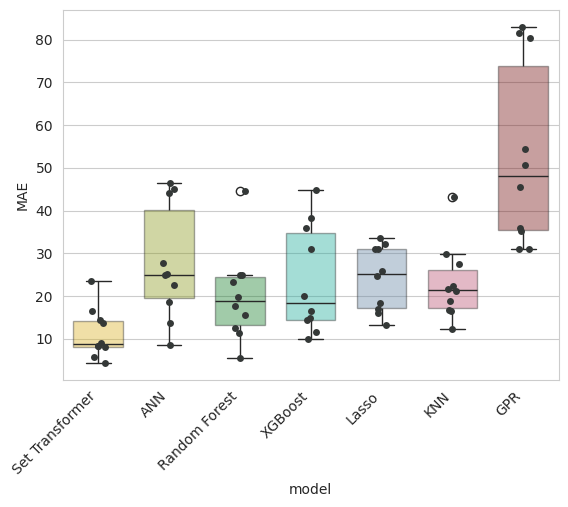

In [135]:
import seaborn as sns

sns.set_style('whitegrid')
boxprops = { 'alpha': 0.4} #'facecolor': 'blue',
# Let's say you have three models, then you might choose three colors with transparency.
# You can adjust colors and alpha (for transparency) values as you prefer.
colors = ['#fac205', '#9aae07',"#028f1e", '#06c2ac', '#5a86ad', '#cb416b', '#840000']  # Here 55 at the end of each color sets the transparency

palette = sns.color_palette(colors)

ax = sns.boxplot(x='model', y='MAE', data=df_test_all, palette=palette, boxprops=boxprops,  width=0.7)
ax = sns.stripplot(x="model", y="MAE", data=df_test_all, color='#343837')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# plt.savefig('model_compare.svg', dpi =600)

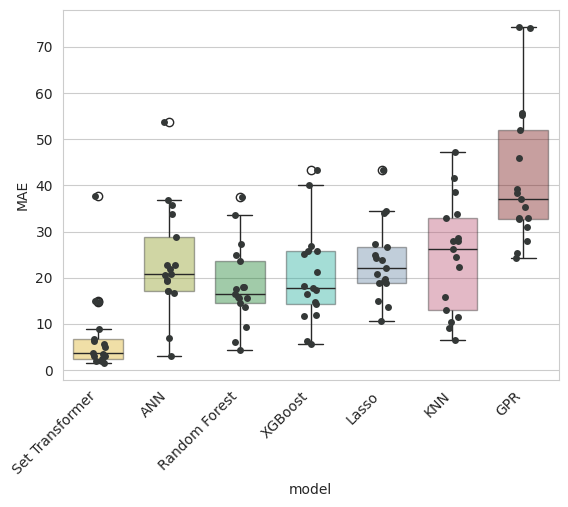

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
boxprops = { 'alpha': 0.4} #'facecolor': 'blue',
# Let's say you have three models, then you might choose three colors with transparency.
# You can adjust colors and alpha (for transparency) values as you prefer.
colors = ['#fac205', '#9aae07',"#028f1e", '#06c2ac', '#5a86ad', '#cb416b', '#840000']  # Here 55 at the end of each color sets the transparency

palette = sns.color_palette(colors)

ax = sns.boxplot(x='model', y='MAE', data=df_test_all, palette=palette, boxprops=boxprops,  width=0.7)
ax = sns.stripplot(x="model", y="MAE", data=df_test_all, color='#343837')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.savefig('model_compare.svg', dpi =600)

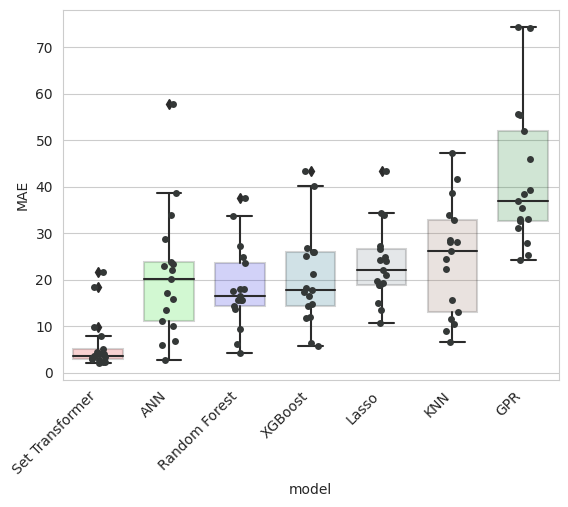

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
boxprops = { 'alpha': 0.2} #'facecolor': 'blue',
# Let's say you have three models, then you might choose three colors with transparency.
# You can adjust colors and alpha (for transparency) values as you prefer.
colors = ["#FF000025", "#00FF0000", "#0000FF55", "#047495", "#748b97", "#9c6d57", "#028f1e"]  # Here 55 at the end of each color sets the transparency

palette = sns.color_palette(colors)

ax = sns.boxplot(x='model', y='MAE', data=df_test_all, palette=palette, boxprops=boxprops,  width=0.7)
ax = sns.stripplot(x="model", y="MAE", data=df_test_all, color='#343837')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.savefig('model_compare.png', dpi =600)